## Process and Describe Project Targets

In [2]:
import pandas as pd
import geopandas as gpd
import json
from matplotlib import pyplot as plt
import amanda

In [3]:
df = pd.read_csv('./cleaned_IL_sd.csv.gz', compression='gzip')

In [4]:
df.head(3)

,origin_census_block_group,date_range_start,date_range_end,device_count,distance_traveled_from_home,bucketed_distance_traveled,median_dwell_at_bucketed_distance_traveled,completely_home_device_count,median_home_dwell_time,bucketed_home_dwell_time,at_home_by_each_hour,part_time_work_behavior_devices,full_time_work_behavior_devices,destination_cbgs,delivery_behavior_devices,median_non_home_dwell_time,candidate_device_count,bucketed_away_from_home_time,median_percentage_time_home,bucketed_percentage_time_home
0,170311201001,2020-04-03T00:00:00-05:00,2020-04-04T00:00:00-05:00,98,3343.0,"{""16001-50000"":5,""0"":52,"">50000"":9,""2001-8000""...","{""16001-50000"":211,"">50000"":680,""<1000"":20,""20...",50,1282,"{""721-1080"":15,""361-720"":7,""61-360"":2,""<60"":10...","[79,77,72,76,73,76,73,70,66,65,67,67,66,64,68,...",4,2,"{""170310815003"":1,""170359724003"":1,""1703112010...",1,0,158,"{""21-45"":4,""481-540"":4,""46-60"":1,""721-840"":1,""...",100,"{""26-50"":2,""51-75"":9,""0-25"":12,"">100"":2,""76-10..."
1,170311604003,2020-04-03T00:00:00-05:00,2020-04-04T00:00:00-05:00,41,4500.0,"{""16001-50000"":4,""0"":14,"">50000"":2,""2001-8000""...","{""16001-50000"":31,"">50000"":358,""<1000"":538,""20...",14,841,"{""721-1080"":9,""361-720"":1,""61-360"":3,""<60"":8,""...","[24,22,24,23,23,23,22,19,20,18,13,16,18,17,19,...",1,1,"{""170313301004"":1,""170312215001"":1,""1703180830...",1,11,85,"{""21-45"":1,""481-540"":1,""46-60"":1,""721-840"":2,""...",97,"{""26-50"":1,""51-75"":6,""0-25"":7,"">100"":2,""76-100..."
2,170312002002,2020-04-03T00:00:00-05:00,2020-04-04T00:00:00-05:00,64,3760.0,"{""16001-50000"":1,""0"":34,"">50000"":1,""2001-8000""...","{""16001-50000"":65,"">50000"":1072,""<1000"":134,""2...",32,999,"{""721-1080"":8,""361-720"":6,""61-360"":8,""<60"":12,...","[39,40,41,40,43,40,45,43,37,41,36,38,33,43,40,...",1,1,"{""170318114014"":1,""170318116002"":1,""1703120020...",1,0,109,"{""21-45"":6,""481-540"":4,""46-60"":2,""721-840"":1,""...",100,"{""26-50"":1,""51-75"":6,""0-25"":12,"">100"":3,""76-10..."


In [5]:
df.dtypes

origin_census_block_group                       int64
date_range_start                               object
date_range_end                                 object
device_count                                    int64
distance_traveled_from_home                   float64
bucketed_distance_traveled                     object
median_dwell_at_bucketed_distance_traveled     object
completely_home_device_count                    int64
median_home_dwell_time                          int64
bucketed_home_dwell_time                       object
at_home_by_each_hour                           object
part_time_work_behavior_devices                 int64
full_time_work_behavior_devices                 int64
destination_cbgs                               object
delivery_behavior_devices                       int64
median_non_home_dwell_time                      int64
candidate_device_count                          int64
bucketed_away_from_home_time                   object
median_percentage_time_home 

In [6]:
df, df_targets = amanda.process_targets(df)

In [7]:
df_targets.describe()

,geo_12,Week,device_count,fraction_of_devices_home,fraction_of_devices_work,fraction_time_away_all,fraction_time_away_leave
count,5.806800e+04,58068.000000,58068.000000,58068.000000,58068.000000,58068.000000,58068.000000
mean,1.707888e+11,15.500121,76.383041,0.420320,0.080829,0.146488,0.252911
std,5.958080e+08,1.707810,64.779606,0.090854,0.029243,0.047715,0.058214
min,1.700100e+11,13.000000,5.000000,0.007454,0.017948,0.006444,0.014207
25%,1.703180e+11,14.000000,42.714286,0.358292,0.060764,0.119539,0.219172
50%,1.704384e+11,16.000000,60.285714,0.424365,0.076296,0.141214,0.245395
75%,1.711796e+11,17.000000,87.857143,0.484775,0.095382,0.165675,0.276345
max,1.720303e+11,18.000000,1384.285714,0.755880,0.482143,0.792599,0.806382


Text(0.5, 1.0, 'Fraction of Devices Completely at Home')

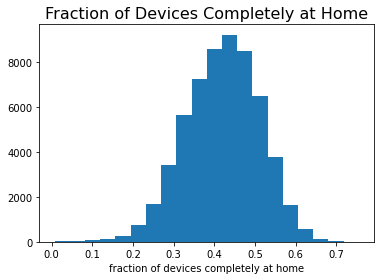

In [8]:
plt.hist(df_targets['fraction_of_devices_home'], bins=20)
plt.xlabel('fraction of devices completely at home')
plt.title('Fraction of Devices Completely at Home', fontsize=16)

Text(0.5, 1.0, 'Fraction of Devices Exhibiting Full or Part Time Work Behavior')

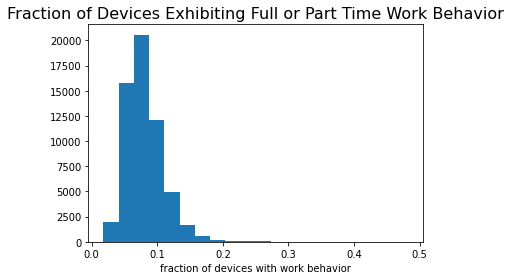

In [9]:
plt.hist(df_targets['fraction_of_devices_work'], bins=20)
plt.xlabel('fraction of devices with work behavior')
plt.title('Fraction of Devices Exhibiting Full or Part Time Work Behavior', fontsize=16)

Text(0.5, 1.0, 'Average Fraction of Time Away from Home per total devices')

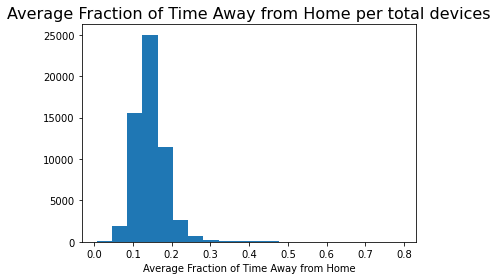

In [10]:
plt.hist(df_targets['fraction_time_away_all'], bins=20)
plt.xlabel('Average Fraction of Time Away from Home')
plt.title('Average Fraction of Time Away from Home per total devices', fontsize=16)

Text(0.5, 1.0, 'Average Fraction of Time Away from Home per devices that leave')

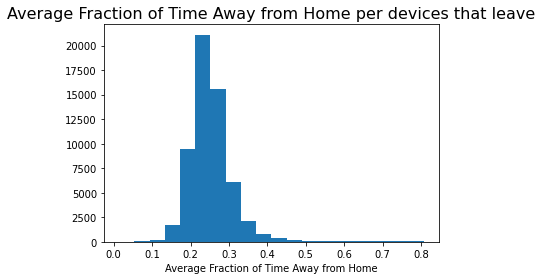

In [11]:
plt.hist(df_targets['fraction_time_away_leave'], bins=20)
plt.xlabel('Average Fraction of Time Away from Home')
plt.title('Average Fraction of Time Away from Home per devices that leave', fontsize=16)

In [12]:
df_targets.corr()

,geo_12,Week,device_count,fraction_of_devices_home,fraction_of_devices_work,fraction_time_away_all,fraction_time_away_leave
geo_12,1.000000,-0.000036,0.168569,-0.287090,0.102488,0.085159,-0.072160
Week,-0.000036,1.000000,-0.015923,-0.121468,0.040357,-0.017939,-0.099690
device_count,0.168569,-0.015923,1.000000,0.035867,-0.248311,-0.055936,-0.069894
fraction_of_devices_home,-0.287090,-0.121468,0.035867,1.000000,-0.357083,-0.622629,-0.151861
fraction_of_devices_work,0.102488,0.040357,-0.248311,-0.357083,1.000000,0.215106,0.081187
fraction_time_away_all,0.085159,-0.017939,-0.055936,-0.622629,0.215106,1.000000,0.843620
fraction_time_away_leave,-0.072160,-0.099690,-0.069894,-0.151861,0.081187,0.843620,1.000000


In [13]:
df_targets.drop(['device_count'], axis=1, inplace=True)

In [14]:
#df_past = pd.read_csv('./social_distancing_data_2019.csv.gz', compression='gzip', index_col=False, low_memory=False)

In [27]:
dfcolumns = pd.read_csv('./social_distancing_data_2019.csv',
                        nrows = 1)
df_past = pd.read_csv('./social_distancing_data_2019.csv',
                  header = None,
                  skiprows = 1,
                  usecols = list(range(len(dfcolumns.columns))),
                  names = dfcolumns.columns)

In [16]:
df_targets.to_csv('COVID_mobility_targets.csv', header=True, index=False)

In [29]:
df_past, df_targets_past = amanda.process_targets(df_past, start_date='2019-03-23', end_date='2019-05-03')

In [31]:
df_past['Week'].unique()

array([13, 12, 14, 16, 17, 15, 18])

In [19]:
df_targets_past.to_csv('COVID_mobility_targets_past.csv', header=True, index=False)

In [20]:
df_merged = df_targets.merge(df_targets_past, on = ["geo_12", "Week"])

In [21]:
df_merged['fraction_of_devices_home_adj'] = df_merged['fraction_of_devices_home_y'] - df_merged['fraction_of_devices_home_x']
df_merged['fraction_of_devices_work_adj'] = df_merged['fraction_of_devices_work_y'] - df_merged['fraction_of_devices_work_x']
df_merged['fraction_time_away_all_adj'] = df_merged['fraction_time_away_all_y'] - df_merged['fraction_time_away_all_x']
df_merged['fraction_time_away_leave_adj'] = df_merged['fraction_time_away_leave_y'] - df_merged['fraction_time_away_leave_x']

In [22]:
adj_targets = df_merged[['geo_12', 'Week', 'fraction_of_devices_home_adj', 'fraction_of_devices_work_adj', 'fraction_time_away_all_adj', 'fraction_time_away_leave_adj']]

In [25]:
adj_targets['Week'].unique()

array([13, 14, 15, 16, 17, 18])

In [83]:
adj_targets.to_csv('COVID_mobility_targets_adjusted.csv', header=True, index=False)

In [67]:
df_targets_past.drop(['device_count'], axis=1, inplace=True)